# ["Nonparametric Bayesian methods" by Tamara Broderick](https://tamarabroderick.com/tutorial_2017_simons.html)

Finite Gaussian mixture model (GMM) with $k=2$ clusters

\begin{align*}
    \mu_k & \sim \mathcal{N}\left(\mu_0, \Sigma_0\right), \; k = 1,2 \\
    \rho_1 & \sim \text{Beta}\left(a_1, a_2\right) \\
    \rho_2 & = 1- \rho_1 \\
    z_n & \sim \text{Categorical}\left(\rho_1, \rho_2\right), \; n=1,\ldots,N \\
    x_n & \sim \mathcal{N}\left(\mu_{z_n}, \Sigma\right), \; n=1,\ldots,N \\
\end{align*}

Everything here but $\left\{ x_n \right\}_{n=1}^N$ is a "latent variable." The $\mu_k$, $\rho_1$, and $\rho_2$ are "global parameters," and $\left(x_n, z_n\right)$ are "local parameters."

#### What does the Beta distribution look like?

It's a distribution over the unit interval, so ideal for probabilities!

In [1]:
import scipy.stats as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Two parameters, $a$ and $b$, both strictly positive.

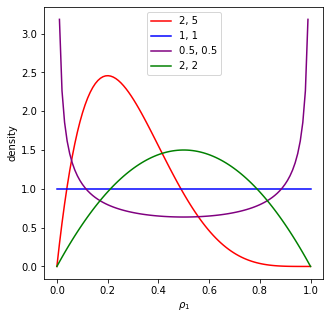

In [2]:
fig, ax = plt.subplots(figsize=(5,5))

xp = np.linspace(0, 1, 100)
for a,b,col in [(2,5, "red"), (1,1,"blue"), (0.5, 0.5, "purple"), (2, 2, "green")]:
    ax.plot(xp, ss.beta.pdf(xp, a=a, b=b), label=f"{a}, {b}", color=col)
ax.set(xlabel=r"$\rho_1$", ylabel="density")
ax.legend()
plt.show()

The Beta distribution is a reasonable distribution for modeling a variable which is itself a probability, since the Beta distribution is over the domain $\left[0,1\right]$. 

Look at limiting behavior as $a,b \rightarrow 0$.

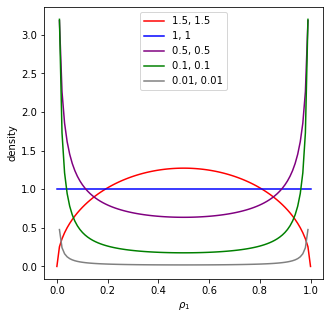

In [3]:
fig, ax = plt.subplots(figsize=(5,5))

xp = np.linspace(0, 1, 100)
for a,b,col in [(1.5,1.5, "red"), (1,1,"blue"), (0.5, 0.5, "purple"), (.1, .1, "green"), (0.01, 0.01, "gray")]:
    ax.plot(xp, ss.beta.pdf(xp, a=a, b=b), label=f"{a}, {b}", color=col)
ax.set(xlabel=r"$\rho_1$", ylabel="density")
ax.legend()
plt.show()

The gray line shows that as $a,b\rightarrow 0$, we have Beta assigning mass to mostly the values 0 and 1.

Let's look at this another way. If we draw a value $\rho_1 \sim \Beta\left(a, a\right)$ where $a \ll 1$, then we have $\rho_2 = 1 - \rho_1$. From the previous plot, we expect to get $\rho_1$ either nearly 0 or nearly 1, and so $\rho_2$ should be nearly 1 or nearly 0, respectively.

Recall that drawing $\rho_1$ and $\rho_2$ this way is generating a __discrete distribution $\left(\rho_1, \rho_2\right)$ over two points__! $\rho_1$ is the probability mass over the first point, and $\rho_2$ over the second.

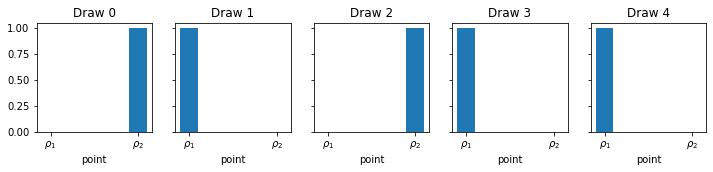

In [4]:
fig, ax = plt.subplots(figsize=(12,2), ncols=5, sharey=True)

for i in range(5):
    rho1 = ss.beta.rvs(a=.01, b=.01)
    rho2 = 1.0 - rho1
    ax[i].bar([1,2], [rho1, rho2], width=0.2)
    ax[i].set(title=f"Draw {i}", xticks=[1,2], xticklabels=[r"$\rho_1$", r"$\rho_2$"], xlabel="point")
plt.show()

Though each of these plots is showing a single draw $\rho_1 \sim \text{Beta}\left(a,b\right)$, we can treat and interpret each as a draw from _a distribution of distributions over two points_, i.e., each plot shows a distribution over two points, and each is "drawn from a Beta distribution". This particular Beta distribution --- where $a=b \ll 1$ --- puts more mass on extreme distributions.

What if we try $a=b=1000$? The PDF looks like

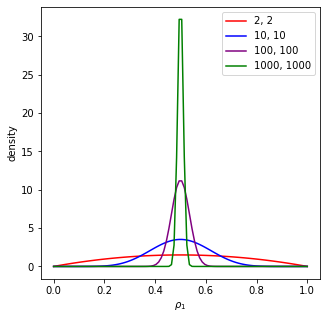

In [5]:
fig, ax = plt.subplots(figsize=(5,5))

xp = np.linspace(0, 1, 100)
for a,b,col in [(2,2, "red"), (10,10,"blue"), (100, 100, "purple"), (1000, 1_000, "green")]:
    ax.plot(xp, ss.beta.pdf(xp, a=a, b=b), label=f"{a}, {b}", color=col)
ax.set(xlabel=r"$\rho_1$", ylabel="density")
ax.legend()
plt.show()

So the Beta distribution for jointly-large parameter values tends to give a $\rho_1$ which is near 0.5; thus, $\rho_2$ will also be near 0.5 and so the distribution $\left(\rho_1, \rho_2\right)$ we "draw from Beta" are going to be essentially uniform over the two points:

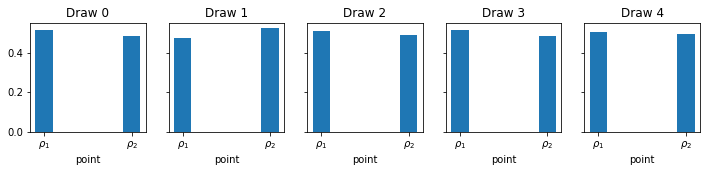

In [6]:
fig, ax = plt.subplots(figsize=(12,2), ncols=5, sharey=True)

for i in range(5):
    rho1 = ss.beta.rvs(a=1_000, b=1_000)
    rho2 = 1.0 - rho1
    ax[i].bar([1,2], [rho1, rho2], width=0.2)
    ax[i].set(title=f"Draw {i}", xticks=[1,2], xticklabels=[r"$\rho_1$", r"$\rho_2$"], xlabel="point")
plt.show()

What if we take $b > a$?

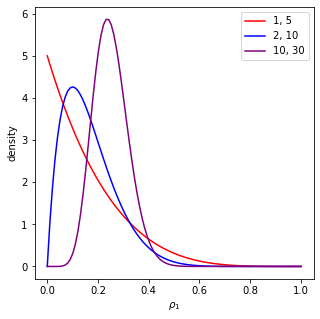

In [7]:
fig, ax = plt.subplots(figsize=(5,5))

xp = np.linspace(0, 1, 100)
for a,b,col in [(1,5, "red"), (2,10,"blue"), (10, 30, "purple")]:
    ax.plot(xp, ss.beta.pdf(xp, a=a, b=b), label=f"{a}, {b}", color=col)
ax.set(xlabel=r"$\rho_1$", ylabel="density")
ax.legend()
plt.show()

It looks like this will keep $\rho_1$ relatively small compared to $\rho_2$.

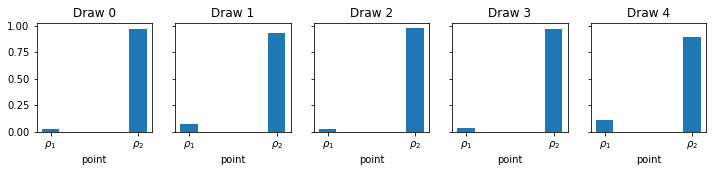

In [8]:
fig, ax = plt.subplots(figsize=(12,2), ncols=5, sharey=True)

for i in range(5):
    rho1 = ss.beta.rvs(a=1, b=5)
    rho2 = 1.0 - rho1
    ax[i].bar([1,2], [rho1, rho2], width=0.2)
    ax[i].set(title=f"Draw {i}", xticks=[1,2], xticklabels=[r"$\rho_1$", r"$\rho_2$"], xlabel="point")
plt.show()

Why does this make sense? The PDF is like

$$ \text{Beta}\left(x\,\middle|\,a,b\right) \propto x^{1 - a}\left(1-x\right)^{1-b} $$

so if $b>1$ is large compared to $a$, then for $x$ near 1, the second term will be very large; for $x$ near 10, the first term will be large, but not nearly as large as the second term was, since $1-b \ll 1-a < 0$.

### Application: Finite GMM

Recall our original problem was a finite Gaussian mixture model with $k=2$ clusters:

\begin{align*}
    \mu_k & \sim \mathcal{N}\left(\mu_0, \Sigma_0\right), \; k = 1,2 \\
    \rho_1 & \sim \text{Beta}\left(a_1, a_2\right) \\
    \rho_2 & = 1- \rho_1 \\
    z_n & \sim \text{Categorical}\left(\rho_1, \rho_2\right), \; n=1,\ldots,N \\
    x_n & \sim \mathcal{N}\left(\mu_{z_n}, \Sigma\right), \; n=1,\ldots,N \\
\end{align*}

In this problem, we start off with some assumptions about the _a priori_ class conditional probabilities: these are $\rho_1$ and $\rho_2$. We encode these assumptions via our choices for the hyperparameters $a_1$ and $a_2$, using the intuition we gained from above.

E.g., if we think points are much more likely to come from the second cluster, we would take $a_2 > a_1$ (this was the final case considered above). If we assume the data is about equally likely to come from either cluster, we would take $a_1 = a_2 \ll 1$; recall that this results in a near-uniform distribution.

Note that these are just the _priors_ over the class probabilities! The "actual" class probabilities are to be inferred (along with the other latent variables in the problem) by performing Bayesian inference to combine our priors with the data observations.

### Extend: more clusters!

What if we want to consider $K>2$ clusters? We need to extend this model. We previously used the Beta distribution to draw $\rho_1$, then used normalization to get $\rho_2$ and obtain a distribution $\left(\rho_1,\rho_2\right)$ over the cluster assignment probabilities. Thus, the Beta distribution was a good choice for priors because it was able to be treated as _a (prior) distribution of distributions_ over the clusters.

Now, that approach with the Beta distribution won't work because we have more than two clusters. The __Dirichlet distribution__ is the natural generalization of the Beta distribution. It is a distribution over the $K-1$ simplex, $$\left\{ x \in \left[0,1\right]^K \; \middle| \; \text{where } \sum_{k=1}^K x_i = 1\right\},$$ which is obviously the set of discrete probability distributions on $K$ points.

Just as we considered Beta as a distribution over distributions over two points, a draw from a Dirichlet distribution results in a distribution over $K$ points. Similarly, the parameters $a_{1:K}$ of the Dirichlet distribution dictate the shape of the drawn distributions.

The model for the mixture of $K$ Gaussians becomes something like
\begin{align*}
    \mu_k & \sim \mathcal{N}\left(\mu_0, \Sigma_0\right), \; k = 1,2,\ldots,K \\
    \rho_{1:K} & \sim \text{Dirichlet}\left(a_{1:K}\right) \\
    z_n & \sim \text{Categorical}\left(\rho_{1:K}\right), \; n=1,\ldots,N \\
    x_n & \sim \mathcal{N}\left(\mu_{z_n}, \Sigma\right), \; n=1,\ldots,N \\
\end{align*}

### Explore the Dirichlet distribution

Let's consider $K=4$. Then our Dirichlet distribution is a distribution over the 4-simplex, and so it will be hard to visualize the PDF of this. Instead, we can do as above and fix values for the parameters $a_{1:4}$ and simulate draws $\rho_{1:4}$ from the Dirichlet.

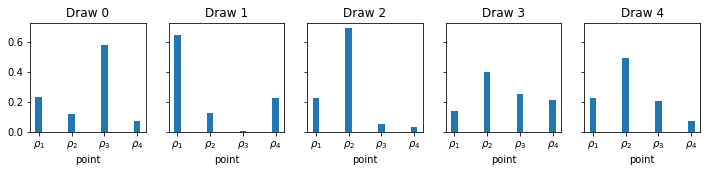

In [9]:
fig, ax = plt.subplots(figsize=(12,2), ncols=5, sharey=True)

for i in range(5):
    rho = ss.dirichlet.rvs(alpha=(1,1,1,1), size=1)
    ax[i].bar(list(range(1,5)), rho[0], width=0.2)
    ax[i].set(title=f"Draw {i}", xticks=range(1,5), xticklabels=[rf"$\rho_{j}$" for j in range(1,5)], xlabel="point")
plt.show()

As expected, each draw is a distribution over 4 points! 

What if we make all of the parameters very small?

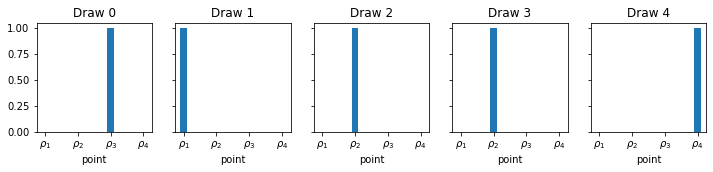

In [10]:
fig, ax = plt.subplots(figsize=(12,2), ncols=5, sharey=True)

for i in range(5):
    rho = ss.dirichlet.rvs(alpha=(0.01,0.01,0.01,0.01), size=1)
    ax[i].bar(list(range(1,5)), rho[0], width=0.2)
    ax[i].set(title=f"Draw {i}", xticks=range(1,5), xticklabels=[rf"$\rho_{j}$" for j in range(1,5)], xlabel="point")
plt.show()

As before, we get extreme distributions which put most of their mass on one of the points (clusters).

What about if we make all the parameters very large?

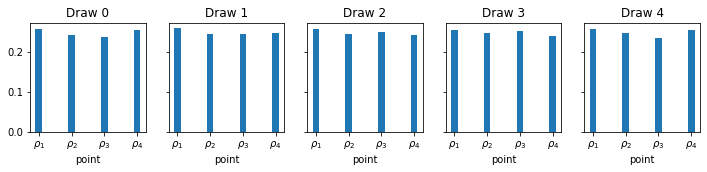

In [11]:
fig, ax = plt.subplots(figsize=(12,2), ncols=5, sharey=True)

for i in range(5):
    rho = ss.dirichlet.rvs(alpha=(1_000,1_000,1_000,1_000), size=1)
    ax[i].bar(list(range(1,5)), rho[0], width=0.2)
    ax[i].set(title=f"Draw {i}", xticks=range(1,5), xticklabels=[rf"$\rho_{j}$" for j in range(1,5)], xlabel="point")
plt.show()

As before, we get roughly uniform distributions.

Last, let's try making one of the parameters large relative to the others.

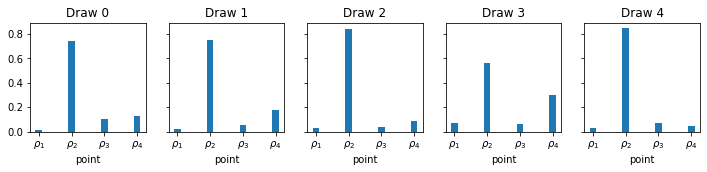

In [12]:
fig, ax = plt.subplots(figsize=(12,2), ncols=5, sharey=True)

for i in range(5):
    rho = ss.dirichlet.rvs(alpha=(1,10,1,1), size=1)
    ax[i].bar(list(range(1,5)), rho[0], width=0.2)
    ax[i].set(title=f"Draw {i}", xticks=range(1,5), xticklabels=[rf"$\rho_{j}$" for j in range(1,5)], xlabel="point")
plt.show()

We get one point (cluster) prioritized over the others.

Remember: these are used as prior distributions over latent cluster assignments! The "actual/true" cluster assignments we get after doing Bayesian inference weigh these priors against the observed data to determine posterior distributions over the latent parameters.

In the example of the $K$ mixtures, the hyperparameter is the vector $a_{1:K}$, and we could easily put a hyperprior on it. The actual latent parameter in the model as we've written it is the vector $\rho_{1:K}$; after doing inference, we should get a posterior distribution over the possible $\rho_{1:K}$ which, as usual, factor in the observations and these priors.

### Issue: we assumed $K \ll N$

This assumption follows from our assumption that all of the clusters are actually observed in the dataset, i.e., we have some observations from all existing clusters.

Broderick makes the distinction:
* a _component_ is a latent group that we would like to infer from the data; and
* a _cluster_ is a component that is actually represented in the data.

In [13]:
def plot_dirichlet_draw(rho: np.ndarray, ax = None, samples: np.ndarray = None, title: str=None):
    """
    Args:
        samples (np.ndarray): Set of integer component assignment indexes as
            drawn from the Dirichlet distribution under consideration.
    """

    ax = ax or plt.gca()
    ax.add_patch(
        matplotlib.patches.Rectangle(
            (0, 0), 1, 1,
            lw=0.5,
            edgecolor='black',
            facecolor='gray',
            alpha=0.5,
            )
        )
    ax.yaxis.set_visible(False)

    lines = rho.cumsum()
    if samples is not None:
        # idxs = set(np.digitize(samples, lines))
        idxs = set(samples)
        for j in idxs:
            # print(f"{lines[j]}, {lines[j+1]}")
            if j != len(lines):
                ax.add_patch(
                    matplotlib.patches.Rectangle(
                        (lines[j], 0),
                        width=lines[j+1] - lines[j],
                        height=1.0,
                        lw=0.5,
                        # edgecolor='black',
                        facecolor='blue',
                        alpha=0.5,
                        )
                    )
        
        print(f"Number of observed clusters: {len(idxs)}")

            
    ax.vlines(lines, 0, 1, lw=0.5, color='black')
    title = title or rf"$\rho \sim$Dirichlet"
    ax.set(xlim=[0,1], ylim=[0,1], title=title)

In [16]:
N = 0
K = 1_000
a = 0.02 * np.ones(K)
rho = ss.dirichlet.rvs(alpha=a)[0]
rho = rho/rho.sum()  # to account for some numerical inaccuracy

def sample_clusters(rho: np.ndarray, n: int = 1):
    """Helper function to get sample clusters."""
    return np.where(ss.multinomial.rvs(p=rho, n=n) != 0)[0]

We have drawn a distribution $\rho$ from our Dirichlet distribution. Now let's try taking a dataset of 80 observations.

Number of observed clusters: 31


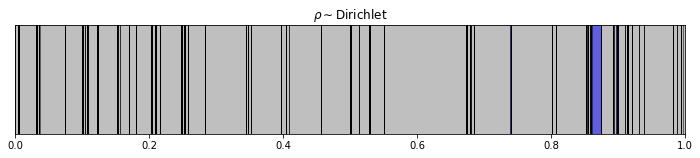

In [18]:
fig, ax = plt.subplots(figsize=(12,2))

samples = sample_clusters(rho, 80)
plot_dirichlet_draw(rho=rho, ax=ax, samples=samples)

We see that even though we took 80 data draws, we only observed 36 / 1000 clusters!

This plot represents a particular draw from a Dirichlet distribution. Here, the vector $\rho = \rho_{1:K}$ is a distribution over $K$ points (clusters), and each vertical line represents the value of a component of this vector/distribution. The horizontal distance between line $j-1$ and line $j$ is exactly the value of $\rho_j$; clearly these sum to 1.

With this interpretation, we can now draw from this particular $\rho = \rho_{1:K}$ by uniformly dropping a point along the $x$-axis here and taking the point/cluster into which $x$ falls.

### See how the clusters appear as we continually sample

In [19]:
N = 0
K = 1_000
a = 0.02 * np.ones(K)
rho = ss.dirichlet.rvs(alpha=a)[0]
rho = rho/rho.sum()  # to account for some numerical inaccuracy

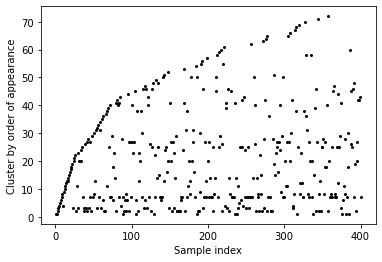

In [20]:
num_pts = 400
sc = [sample_clusters(rho=rho)[0] for _ in range(num_pts)]

fig, ax = plt.subplots()

d = {}
nc = 0
y = np.zeros(num_pts)

for i, s in enumerate(sc):
    if s not in d:
        nc += 1
        d[s] = nc
    y[i] = d[s]

ax.scatter(range(1,1+len(y)), y, s=4, c='k')
ax.set(
    xlabel="Sample index",
    ylabel="Cluster by order of appearance",
    xticks=range(0,500,100),
    yticks=range(0,80,10),
)
plt.show()

This shows that taking more samples does not necessarily guarantee that we will get great coverage of the clusters! By the end of this simulation, we've taken 400 samples but seen only observed about 70 of the known 1000 clusters in the data. Note that we know how many clusters there actually are because we simulated this data; in the real world, we would not know this!

### What does this mean for us?

Recall than in a standard mixture model, we need to decide on our $K$ as a modeling decision. We may make poor inferences if we choose $K$ too small, which is highly likely as demonstrated by the previous simulation.

How can we take $K = \infty$?

Notice the following relationship between the Dirichlet and Beta distributions. we can take a single draw from a Dirichlet distribution, like so:

$$ \rho_{1:K} \sim \text{Dirichlet}\left( a_{1:K} \right) $$

Equivalently, we can first draw $\rho_1$ from a Beta distribution:

$$ \rho_1 \sim \text{Beta}\left( a_1, \sum_{k=1}^K a_k - a_1 \right) $$

and then draw the remaining "mass proportions" according to a Dirichlet:

$$ \frac{\left(\rho_2,\ldots,\rho_K\right)}{1 - \rho_1} \sim \text{Dirichlet}\left(a_2,\ldots, a_K\right)$$

This equivalence is often called "stick breaking," by making the analogy between the unit interval and a stick. 

### Stick Breaking example: $K=4$ components

Start with a full stick, $\left[0,1\right]$, and break off a portion of it according to $$\rho_1 = V_1 \sim \text{Beta}\left(a_1, a_2 + a_3 + a_4\right) $$

Now there is $1-V_1$ mass (length) left in the stick. Thus the remaining values $\rho_2, \rho_3$, and $\rho_4$ are like a Dirichlet draw over the mass $1-\rho_1$ (instead of over 1). 

 Break off a second piece: the proportion is
 $$ V_2 \sim \text{Beta}\left(a_2, a_3+a_4\right) $$

Then the mass/length we just broke off is $$ \rho_2 = \left(1-V_1\right)V_2 $$ where the first factor is how much mass was left after the first breaking. 

The next proportion is $$ V_3 \sim \text{Beta}\left(a_3, a_4\right) $$ which corresponds to a mass $$ \rho_3 = \left(1-V_1\right)\left(1-V_2\right)V_3 $$

The last mass comes easily from normalization: $$ \rho_4 = 1 - \sum_{k=1}^3 \rho_k $$

This process can be easily generalized to $K$ arbitrary, perhaps infinite:

$$ V_k \sim \text{Beta}\left(a_k, b_k\right), \; \text{and } \rho_k = V_k\prod_{l=1}^{k-1}\left(1-V_l\right) $$

But how to choose the $a_k, b_k$?

Simplification: take $a_k=1$ and $b_k=\alpha > 0$.

This choice defines what is called the __Dirichlet process stick breaking__, AKA the GEM distribution $$\rho=\left(\rho_1, \rho_2, \rho_3,\ldots\right) \sim \text{GEM}\left(\alpha\right).$$

In [25]:
def GEM(alpha: float = 1.0, n_approx=1000):
    rho = np.zeros(n_approx)
    for i in range(n_approx):
        V_i = ss.beta.rvs(1.0, alpha)
        if i == 0:
            rho[i] = V_i
        else:
            rho[i] = np.exp(np.log(V_i) + np.sum(np.log(1 - rho[:i])))
    return rho

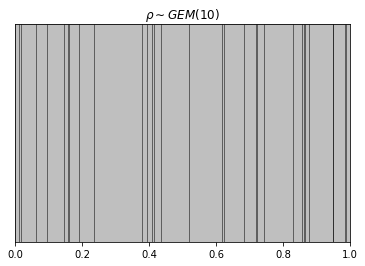

In [26]:
alpha = 10
rho = GEM(alpha, 10000)

plot_dirichlet_draw(rho, title=fr"$\rho \sim GEM({alpha})$")

It is sensible for the $\rho$ components to "bunch up" at the end of the interval, since there are theoretically infinitely many of them, and so they will need to get arbitrarily small in order to fit all of them into the unit interval.

If we think about generating data from our distribution, we typically will generate all of the cluster assignments for each observation and then, for each observation, draw from the corresponding distribution.

For finite $K$:

\begin{align*}
    \rho = \rho_{1:K} \sim & \,\text{Dirichlet}\left(\alpha\right) \\
    \mu_k & \sim \mathcal{N}\left(\mu_0, \Sigma_0\right) \\
    z_n \sim & \,\text{Categorical}\left(\rho_{1:K}\right), \; n=1,\ldots,N \\
\end{align*}

What's happening here?
1. We draw a distribution $\rho=\rho_{1:K}$ over $K$ cluster assignments from a Dirichlet distribution;
2. For each cluster $k$, we draw/generate a cluster mean from some prior: $\mu_k \sim \mathcal{N}\left( \mu_0, \Sigma_0\right)$; 
3. For each observation $n$ we draw a cluster assignment: $z_n \sim \text{Categorical}\left(\rho_{1:K}\right)$;
4. For each observation $n$, draw the observation from the appropriate cluster mean: $x_n \sim \mathcal{N}\left(\mu_{z_n}, \Sigma \right)$.

In [48]:
ss.multivariate_normal.rvs(mean=[1,2,3])

array([-0.30717253,  1.87561228,  2.06438148])

In [50]:
mu_0 = np.array([0.0,0.0,0.0])
sigma_0 = np.eye(3)
ss.multivariate_normal.rvs(mean=mu_0, cov=sigma_0, size=3)

array([[-2.05700023, -0.77385333,  0.38004655],
       [ 0.81207301,  0.12498138, -1.15133612],
       [ 0.22733271,  1.17654329, -1.38642984]])

In [90]:
K = 3
dims = 2

# generate cluster means from common prior
mu_0 = np.zeros(dims)
sigma_0 = np.eye(dims)
mu = ss.multivariate_normal.rvs(mean=mu_0, cov=sigma_0, size=K)
sigma = np.eye(dims)

# generate cluster assignment prior probabilities
alpha = np.array([2.0, 5.0, 6.0])
rho = ss.dirichlet.rvs(alpha=alpha)

# generate observations' cluster assignments
N = 100
z_n = np.random.choice(a=range(K), p=rho[0], size=N)

# generate observations
mu_n = np.array([mu[n] for n in z_n])

x_n = np.stack([ss.multivariate_normal.rvs(mean=mu[n], cov=sigma) for n in z_n], axis=0)

In [95]:
mu

array([[ 0.8182761 ,  1.18534883],
       [ 0.1867016 ,  0.0070098 ],
       [ 1.42435982, -0.49546047]])

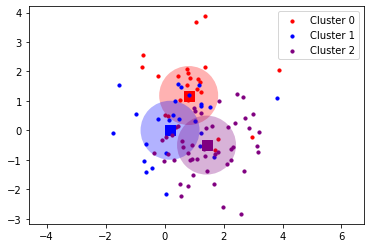

In [99]:
fig, ax = plt.subplots()

for k, col in [(0, 'red'), (1, 'blue'), (2, 'purple')]:
    x_k = x_n[z_n == k, :]
    ax.scatter(x_k[:, 0], x_k[:, 1], label=f"Cluster {k}", s=10, color=col)
    ax.scatter(mu[k,0], mu[k,1], s=100, marker='s', color=col)
    ax.add_patch(
        matplotlib.patches.Circle(
            (mu[k,0], mu[k,1]),
            1,
            facecolor=col,
            alpha=0.3,
            )
        )
ax.legend()
plt.axis('equal')
plt.show()

In performing this process we think of the distinct steps of drawing a distribution $\rho$ over clusters and then for each observation drawing an individual cluster, then drawing the observation from that cluster.

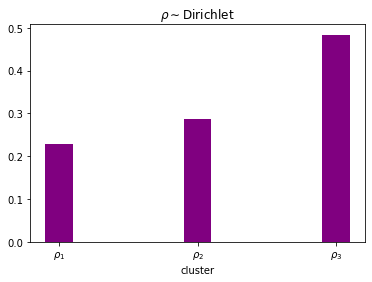

In [110]:
fig, ax = plt.subplots()
cmpts = range(1,K+1)
ax.bar(cmpts, rho.flatten(), width=0.2, color='purple')
ax.set(xticks=cmpts, xticklabels=[rf"$\rho_{j}$" for j in cmpts], xlabel="cluster", title=r"$\rho \sim$Dirichlet")
plt.show()

Equivalently, we could imagine $\rho$ as giving us __a distribution over the cluster means__, and just draw an observation by choosing a mean and then drawing from the associated normal distribution.

In other words, $\rho$ is a distribution over the cluster means in $\mathbb{R}^D$!

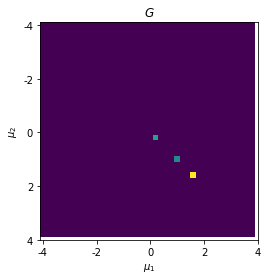

In [203]:
X = np.arange(-4, 4, 0.2)
X, Y = np.meshgrid(X,X)
Z = np.zeros_like(X)

rho_f = rho.flatten()

for k in range(K):
    mu_k = mu[k, :]

    x_idx = np.where(X[0,:] >= mu_k[0])[0].min()
    y_idx = np.where(Y[:,0] >= mu_k[0])[0].min()

    Z[y_idx, x_idx] = rho_f[k]

fig, ax = plt.subplots()
ax.imshow(Z, cmap='viridis')
ax.set(
    xticks=range(0,50,10),
    xticklabels=range(-4,5,2),
    yticks=range(0,50,10),
    yticklabels=range(-4,5,2),
    xlabel=r"$\mu_1$",
    ylabel=r"$\mu_2$",
    title=r"$G$",
)
plt.show()


We call this distribution $G$: $$ G = \sum_{k=1}^K \rho_k \delta_{\mu_k} $$ where we are placing mass only on those cluster means.

If we extend $K\rightarrow \infty$, this is a __Dirichlet process__:

$$ G = \sum_{k=1}^{\infty} \rho_k \delta_{\mu_k} = \text{DP}\left(\alpha, \mathcal{N}\left(\mu_0, \Sigma_0\right) \right)$$

There are two parameters:
* $\alpha$: the parameter of the GEM distribution which underlies the cluster assignments; and
* the base measure from which we draw the distributions (?).

Now, to actually draw observations from this distribution, we will do $$ z_n \sim \text{Categorical}\left(\rho\right), $$ and set $\mu_n^* = \mu_{z_n}$, which is equivalent to doing $$ \mu_n^* \sim G. $$ Finally, we just draw observations from the usual normal around the appropriate cluster, $$ x_n \sim \mathcal{N}\left( \mu_n^*, \Sigma\right). $$

### How do we actually _do_ all of this with infinity, practically?

We need to
1. draw an infinity of cluster means $\mu_{1:\infty}$; and
2. draw a $\rho_{1:\infty}$.

 Obviously we can't draw infinitely many values. Instead, we can draw them __on demand__, which relies on the fact that we draw things independently.

To draw a single observation:
1. Make a uniform random draw $\eta$ from $\left[0,1\right]$;
2. Generate $\rho_1, \rho_2, \ldots, \rho_k$ until we get $\rho_k > \eta$. Then we know that our data point must belong to component $k$;
3. For each $\rho_{1:K}$ that we drew, generate the mean of it's cluster, $\mu_k$, and store these somewhere;
4. Draw an observation from the normal distribution associated with $\rho_k$.

To draw more data points, repeat the process. If the uniform random draw for another data point ends up falling into a bin that we already have the cluster mean for, then we can just use that already-generated cluster mean!

In [248]:
np.zeros(3)

array([0., 0., 0.])

In [348]:
N_obs = 1126
N_clusters_max = 5_000
n_clusters_obs = 0

x = np.zeros((N_obs, 2))  # x_n
z = np.zeros(N_obs, dtype=int)  # z_n
mu = np.zeros((N_clusters_max, 2))
rho = np.zeros(N_clusters_max).ravel() # store the rhos
V = np.zeros_like(rho) # store the proportions

dims = 2

# common mean prior params
mu_0 = np.zeros(dims)
# sigma_0 = np.eye(dims)
sigma = np.eye(dims)
sigma_0 = np.array([[3., 1.],[0.0, 3.]])
sigma = np.array([[4.,1.],[0.,3.]])

def generate_cluster_mean(mu_0, sigma_0):
    return ss.multivariate_normal.rvs(mean=mu_0, cov=sigma_0)

def draw_from_cluster(mu_k, sigma_k = sigma):
    return ss.multivariate_normal.rvs(mean=mu_k, cov=sigma_k)

alpha = 2.0
# Draw an initial cluster
V[0] = ss.beta.rvs(1.0, alpha)  # draw a proportion
rho[0] = V[0]
mu[0,:] = generate_cluster_mean(mu_0, sigma_0)
n_clusters_obs = 1

for n in range(N_obs):
    # uniform draw
    eta = ss.uniform.rvs()

    accum = rho[:n_clusters_obs].sum()
    if eta > accum:  # we need to draw more rhos
        while accum < eta:
            V[n_clusters_obs] = ss.beta.rvs(1.0, alpha)  # draw a proportion
            rho[n_clusters_obs] = V[n_clusters_obs] * np.prod( 1 - V[:n_clusters_obs] )
            mu[n_clusters_obs,:] = generate_cluster_mean(mu_0, sigma_0)
            n_clusters_obs += 1
            accum = rho[:n_clusters_obs].sum()

        z_n = n_clusters_obs - 1
    else:  # find the cluster to draw from
        # This is basically drawing from a categorical distribution via
        # a uniform draw
        z_n = np.where(rho.cumsum() >= eta)[0][0]
        
    # draw an observation
    x[n,:] = ss.multivariate_normal.rvs(mean=mu[z_n, :], cov=sigma)
    z[n] = int(z_n)

n_clusters_actually_obs = len(set(z[:N_obs]))

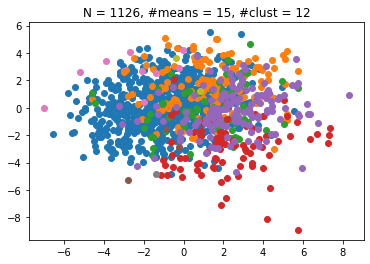

In [349]:
fig, ax = plt.subplots()

for k in range(n_clusters_obs):
    x_k = x[z == k, :]
    ax.scatter(x_k[:,0], x_k[:,1])
ax.set(title=f"N = {N_obs}, #means = {n_clusters_obs}, #clust = {n_clusters_actually_obs}")
plt.show()